In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [50]:
df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


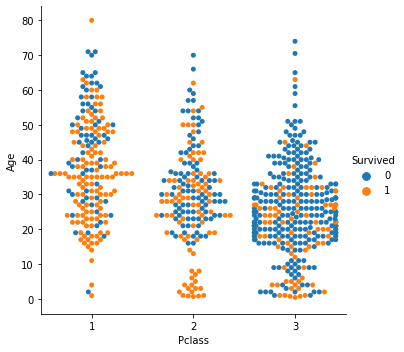

In [52]:
sns.catplot(y='Age',x='Pclass',hue='Survived',data=df,kind='swarm')
##shows most Class 3 people died irrespective or age
##Hence Class is important

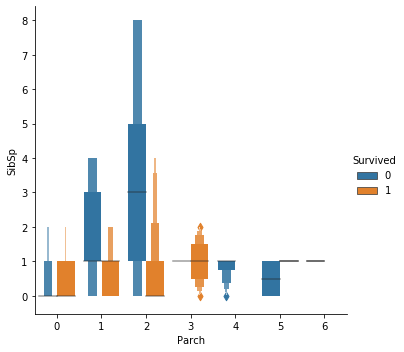

In [53]:
sns.catplot(y='SibSp',x='Parch',hue='Survived',data=df,kind='boxen')

##looks like people with less Parch and/or SibSp survived
##can combine the two into single feature n_relatives

In [54]:
df.isna().any()
##no null vals for Parch and SibSp

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [55]:
df['n_relatives'] = df['Parch'] + df['SibSp']

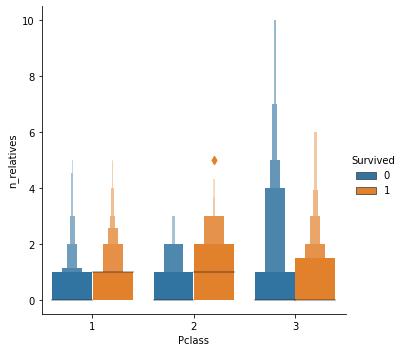

In [56]:
sns.catplot(y='n_relatives',x='Pclass',hue='Survived',data=df,kind='boxen')
##show most survived had <4 relatives on ship

In [57]:
##dropping Parch and SibSp
df.drop(['SibSp','Parch'],axis=1,inplace=True)

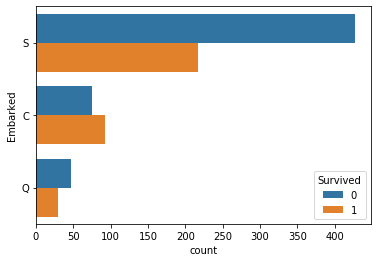

In [58]:
sns.countplot(y='Embarked',hue='Survived',data=df)
##show most people were embarked to S and most of the survived ones were also embarked to S,
##but does not mean S==>survived,C has better chances for survial

In [59]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [60]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,n_relatives
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


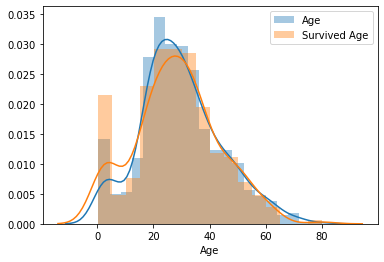

In [61]:
sns.distplot(df['Age'],label='Age')
sns.distplot(df[ df['Survived']==1 ]['Age'],label='Survived Age')
plt.legend()
##looks like distribution for both is same

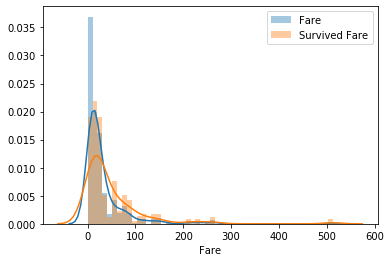

In [62]:
sns.distplot(df['Fare'],label='Fare',bins=50)
sns.distplot(df[ df['Survived']==1 ]['Fare'],label='Survived Fare',bins=50)
plt.legend()
##looks like fare had no major impact on outcome

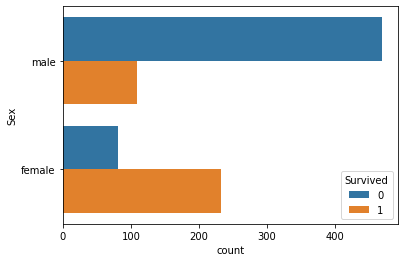

In [15]:
sns.countplot(y='Sex',data=df,hue='Survived')
##clearly women had far better survival rate

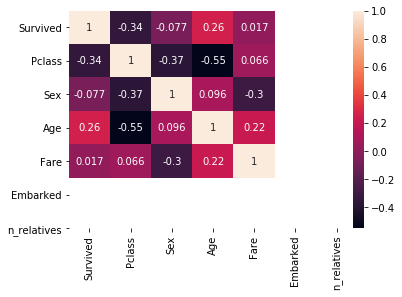

In [63]:
sns.heatmap(df.corr(),
            xticklabels=df.columns,
            yticklabels=df.columns,
            annot=True)
##seems Pclass,Sex and Fare have good correlation with survival

In [78]:
##to try: bin fare in groups

In [69]:
df.isna().any()

Survived       False
Age            False
Fare           False
n_relatives    False
Pclass_1       False
Pclass_2       False
Pclass_3       False
Embarked_0     False
Embarked_1     False
Embarked_2     False
Sex_0          False
Sex_1          False
dtype: bool

In [65]:
##pre processing:

## 1.Fill in missing data

df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna( df['Embarked'].mode()[0],inplace=True )

In [66]:
## 3.Convert strings to categorical data
categorical_cols = ['Embarked','Sex']
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.astype('category').cat.codes)

In [38]:
##to-do:try various models here

0.7988826815642458

In [67]:
## 4.Convert categories into one-hot
df = pd.get_dummies(columns=['Pclass','Embarked','Sex'],data=df)

In [68]:
## 5.Normalize Data(Age,Fare)

scaler = preprocessing.StandardScaler()

df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])

In [70]:
df.head()

,Survived,Age,Fare,n_relatives,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1
0,0,-0.565736,-0.502445,1,0,0,1,0,0,1,0,1
1,1,0.663861,0.786845,1,1,0,0,1,0,0,1,0
2,1,-0.258337,-0.488854,0,0,0,1,0,0,1,1,0
3,1,0.433312,0.420730,1,1,0,0,0,0,1,1,0
4,0,0.433312,-0.486337,0,0,0,1,0,0,1,0,1


In [71]:
## 6.Separate features and labels

labels = df['Survived']
features = df.drop(['Survived'],axis=1)

In [72]:
## 7.Split the dataset into train and validation sets

X_train,X_test,y_train,y_test = train_test_split(features,labels,train_size=0.8,random_state=42)

In [83]:
##model

model = tf.keras.Sequential([tf.keras.layers.Dense(11),
                            tf.keras.layers.Dense(31,activation='relu'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(13,activation='relu'),
                            tf.keras.layers.Dropout(0.4),
                            tf.keras.layers.Dense(2)])

In [84]:
model.compile(optimizer='Adam',
              loss= 'mse',
              metrics=['binary_accuracy'])

In [85]:
model.fit(X_train.to_numpy(),y_train.to_numpy(),epochs=500)

Train on 712 samples
Epoch 1/500
712/712 [==============================] - 1s 705us/sample - loss: 0.9817 - binary_accuracy: 0.6145
Epoch 2/500
712/712 [==============================] - 0s 155us/sample - loss: 0.5091 - binary_accuracy: 0.5990
Epoch 3/500
712/712 [==============================] - 0s 101us/sample - loss: 0.3734 - binary_accuracy: 0.6088
Epoch 4/500
712/712 [==============================] - 0s 112us/sample - loss: 0.3178 - binary_accuracy: 0.6292
Epoch 5/500
712/712 [==============================] - 0s 181us/sample - loss: 0.2848 - binary_accuracy: 0.6461
Epoch 6/500
712/712 [==============================] - 0s 118us/sample - loss: 0.2806 - binary_accuracy: 0.6636
Epoch 7/500
712/712 [==============================] - 0s 148us/sample - loss: 0.2495 - binary_accuracy: 0.6875
Epoch 8/500
712/712 [==============================] - 0s 150us/sample - loss: 0.2502 - binary_accuracy: 0.6868
Epoch 9/500
712/712 [==============================] - 0s 138us/sample - loss: 0.23

712/712 [==============================] - 0s 152us/sample - loss: 0.1600 - binary_accuracy: 0.7802
Epoch 74/500
712/712 [==============================] - 0s 121us/sample - loss: 0.1533 - binary_accuracy: 0.8006
Epoch 75/500
712/712 [==============================] - 0s 126us/sample - loss: 0.1514 - binary_accuracy: 0.8055
Epoch 76/500
712/712 [==============================] - 0s 98us/sample - loss: 0.1518 - binary_accuracy: 0.7978
Epoch 77/500
712/712 [==============================] - 0s 129us/sample - loss: 0.1545 - binary_accuracy: 0.8020
Epoch 78/500
712/712 [==============================] - 0s 140us/sample - loss: 0.1578 - binary_accuracy: 0.7795
Epoch 79/500
712/712 [==============================] - 0s 364us/sample - loss: 0.1518 - binary_accuracy: 0.8090
Epoch 80/500
712/712 [==============================] - 0s 125us/sample - loss: 0.1538 - binary_accuracy: 0.7893
Epoch 81/500
712/712 [==============================] - 0s 116us/sample - loss: 0.1588 - binary_accuracy: 0.78

712/712 [==============================] - 0s 228us/sample - loss: 0.1351 - binary_accuracy: 0.8167
Epoch 146/500
712/712 [==============================] - 0s 272us/sample - loss: 0.1435 - binary_accuracy: 0.8209
Epoch 147/500
712/712 [==============================] - 0s 127us/sample - loss: 0.1433 - binary_accuracy: 0.8013
Epoch 148/500
712/712 [==============================] - 0s 222us/sample - loss: 0.1355 - binary_accuracy: 0.8265
Epoch 149/500
712/712 [==============================] - 0s 211us/sample - loss: 0.1474 - binary_accuracy: 0.7956
Epoch 150/500
712/712 [==============================] - 0s 154us/sample - loss: 0.1301 - binary_accuracy: 0.8329
Epoch 151/500
712/712 [==============================] - 0s 366us/sample - loss: 0.1454 - binary_accuracy: 0.8118
Epoch 152/500
712/712 [==============================] - 0s 159us/sample - loss: 0.1410 - binary_accuracy: 0.8146
Epoch 153/500
712/712 [==============================] - 0s 156us/sample - loss: 0.1450 - binary_accur

Epoch 217/500
712/712 [==============================] - 0s 148us/sample - loss: 0.1412 - binary_accuracy: 0.8209
Epoch 218/500
712/712 [==============================] - 0s 143us/sample - loss: 0.1418 - binary_accuracy: 0.8265
Epoch 219/500
712/712 [==============================] - 0s 170us/sample - loss: 0.1400 - binary_accuracy: 0.8146
Epoch 220/500
712/712 [==============================] - 0s 138us/sample - loss: 0.1375 - binary_accuracy: 0.8230
Epoch 221/500
712/712 [==============================] - 0s 172us/sample - loss: 0.1326 - binary_accuracy: 0.8385
Epoch 222/500
712/712 [==============================] - 0s 175us/sample - loss: 0.1361 - binary_accuracy: 0.8301
Epoch 223/500
712/712 [==============================] - 0s 202us/sample - loss: 0.1386 - binary_accuracy: 0.8153
Epoch 224/500
712/712 [==============================] - 0s 170us/sample - loss: 0.1352 - binary_accuracy: 0.8153
Epoch 225/500
712/712 [==============================] - 0s 196us/sample - loss: 0.1406 

712/712 [==============================] - 0s 164us/sample - loss: 0.1330 - binary_accuracy: 0.8308
Epoch 289/500
712/712 [==============================] - 0s 144us/sample - loss: 0.1288 - binary_accuracy: 0.8364
Epoch 290/500
712/712 [==============================] - 0s 204us/sample - loss: 0.1321 - binary_accuracy: 0.8378
Epoch 291/500
712/712 [==============================] - 0s 152us/sample - loss: 0.1341 - binary_accuracy: 0.8385
Epoch 292/500
712/712 [==============================] - 0s 123us/sample - loss: 0.1395 - binary_accuracy: 0.8244
Epoch 293/500
712/712 [==============================] - 0s 201us/sample - loss: 0.1342 - binary_accuracy: 0.8357
Epoch 294/500
712/712 [==============================] - 0s 172us/sample - loss: 0.1368 - binary_accuracy: 0.8160
Epoch 295/500
712/712 [==============================] - 0s 181us/sample - loss: 0.1402 - binary_accuracy: 0.8195
Epoch 296/500
712/712 [==============================] - 0s 208us/sample - loss: 0.1333 - binary_accur

Epoch 360/500
712/712 [==============================] - 0s 197us/sample - loss: 0.1383 - binary_accuracy: 0.8329
Epoch 361/500
712/712 [==============================] - 0s 144us/sample - loss: 0.1359 - binary_accuracy: 0.8251
Epoch 362/500
712/712 [==============================] - 0s 279us/sample - loss: 0.1361 - binary_accuracy: 0.8181
Epoch 363/500
712/712 [==============================] - 0s 148us/sample - loss: 0.1322 - binary_accuracy: 0.8364
Epoch 364/500
712/712 [==============================] - 0s 139us/sample - loss: 0.1340 - binary_accuracy: 0.8265
Epoch 365/500
712/712 [==============================] - 0s 145us/sample - loss: 0.1357 - binary_accuracy: 0.8272
Epoch 366/500
712/712 [==============================] - 0s 173us/sample - loss: 0.1404 - binary_accuracy: 0.8343
Epoch 367/500
712/712 [==============================] - 0s 159us/sample - loss: 0.1356 - binary_accuracy: 0.8336
Epoch 368/500
712/712 [==============================] - 0s 149us/sample - loss: 0.1327 

712/712 [==============================] - 0s 238us/sample - loss: 0.1298 - binary_accuracy: 0.8469
Epoch 432/500
712/712 [==============================] - 0s 158us/sample - loss: 0.1309 - binary_accuracy: 0.8308
Epoch 433/500
712/712 [==============================] - 0s 169us/sample - loss: 0.1312 - binary_accuracy: 0.8343
Epoch 434/500
712/712 [==============================] - 0s 111us/sample - loss: 0.1306 - binary_accuracy: 0.8490
Epoch 435/500
712/712 [==============================] - 0s 160us/sample - loss: 0.1295 - binary_accuracy: 0.8427
Epoch 436/500
712/712 [==============================] - 0s 146us/sample - loss: 0.1276 - binary_accuracy: 0.8413
Epoch 437/500
712/712 [==============================] - 0s 183us/sample - loss: 0.1350 - binary_accuracy: 0.8357
Epoch 438/500
712/712 [==============================] - 0s 160us/sample - loss: 0.1285 - binary_accuracy: 0.8399
Epoch 439/500
712/712 [==============================] - 0s 137us/sample - loss: 0.1355 - binary_accur

In [86]:
model.evaluate(X_test.to_numpy(),y_test.to_numpy(),verbose=2)

179/1 - 0s - loss: 0.1390 - binary_accuracy: 0.8073


[0.13193527172064648, 0.8072626]